## Civis Assessment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Read in and review Household, Individual and Registration datasets.  
Will run info() and describe() to check for missing values and take a quick look at some basic stats.

In [3]:
df_hh = pd.read_csv("../data/household_data.csv")
df_hh.head()

,hh_id,hh_income,is_urban,is_owner_of_home,tercile_of_census_tract_income
0,1,111000,1,0,Middle
1,2,123000,1,1,Bottom
2,3,105400,1,0,Middle
3,4,48100,1,0,Top
4,5,54600,0,0,Top


In [9]:
df_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
hh_id                             10000 non-null int64
hh_income                         10000 non-null int64
is_urban                          10000 non-null int64
is_owner_of_home                  10000 non-null int64
tercile_of_census_tract_income    10000 non-null object
dtypes: int64(4), object(1)
memory usage: 390.7+ KB


In [14]:
df_hh.describe()

,hh_id,hh_income,is_urban,is_owner_of_home
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,80408.040000,0.602500,0.243400
std,2886.89568,25905.428977,0.489405,0.429156
min,1.00000,31200.000000,0.000000,0.000000
25%,2500.75000,51800.000000,0.000000,0.000000
50%,5000.50000,90600.000000,1.000000,0.000000
75%,7500.25000,102200.000000,1.000000,0.000000
max,10000.00000,137800.000000,1.000000,1.000000


In [4]:
df_ind = pd.read_csv("../data/individual_data.csv")
df_ind.head(10)

,hh_id,person_id,is_head_of_household,married,gender,race,age,voted_in_2012,is_college_graduate
0,1,1,1,Single,Female,White,28,0,1
1,1,2,0,Single,Male,White,27,1,1
2,2,3,1,Married,Female,White,34,0,1
3,2,4,0,Married,Male,White,33,1,0
4,2,5,0,Single,Male,White,6,0,1
5,3,6,1,Single,Female,White,28,0,1
6,3,7,0,Single,Male,White,29,1,0
7,4,8,1,Single,Female,White,30,0,1
8,4,9,0,Single,FEMALE,White,3,0,0
9,5,10,1,Single,Female,White,30,1,1


In [17]:
df_ind["race"].unique()

array(['White', 'Asian', 'Black'], dtype=object)

In [11]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21046 entries, 0 to 21045
Data columns (total 9 columns):
hh_id                   21046 non-null int64
person_id               21046 non-null int64
is_head_of_household    21046 non-null int64
married                 21046 non-null object
gender                  21046 non-null object
race                    21046 non-null object
age                     21046 non-null int64
voted_in_2012           21046 non-null int64
is_college_graduate     21046 non-null int64
dtypes: int64(6), object(3)
memory usage: 1.4+ MB


In [13]:
df_ind.describe()

,hh_id,person_id,is_head_of_household,age,voted_in_2012,is_college_graduate
count,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000,21046.000000
mean,4996.867861,10523.500000,0.475150,24.350851,0.380500,0.700703
std,2885.491077,6075.601219,0.499394,11.298379,0.485521,0.457961
min,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000
25%,2508.250000,5262.250000,0.000000,25.000000,0.000000,0.000000
50%,4993.500000,10523.500000,0.000000,30.000000,0.000000,1.000000
75%,7498.000000,15784.750000,1.000000,32.000000,1.000000,1.000000
max,10000.000000,21046.000000,1.000000,34.000000,1.000000,1.000000


In [5]:
df_reg = pd.read_csv("../data/registration_status.csv")
df_reg.head()

,person_id,is_registered_democrat
0,1,0.0
1,2,0.0
2,3,0.0
3,4,1.0
4,5,0.0


As noted in the assessment document some people do not have a value for is_registered_democrat

In [9]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21046 entries, 0 to 21045
Data columns (total 2 columns):
person_id                 21046 non-null int64
is_registered_democrat    21046 non-null int64
dtypes: int64(2)
memory usage: 328.9 KB


In [6]:
df_reg["is_registered_democrat"].fillna(-1, inplace=True)

In [7]:
df_reg["is_registered_democrat"].value_counts()

-1.0    10509
 0.0     7859
 1.0     2678
Name: is_registered_democrat, dtype: int64

In [8]:
df_reg["is_registered_democrat"] = df_reg["is_registered_democrat"].astype(int)

In [10]:
df_reg.head()

,person_id,is_registered_democrat
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [ ]:
# TODO Merge with hh and ind and then break in train/test, test = -1 which indicates missing

## Section 1, Part 1

### Part 1: Question 1
**Create a feature to indicate if individual is an adult (i.e. 18 or older).  What is the percent of the sample are adults?**

In [22]:
#df_ind.columns

Index(['hh_id', 'person_id', 'is_head_of_household', 'married', 'gender',
       'race', 'age', 'voted_in_2012', 'is_college_graduate', 'is_adult'],
      dtype='object')

In [11]:
df_ind["is_adult"] = np.where(df_ind["age"] >= 18, 1, 0)
df_ind.head()

,hh_id,person_id,is_head_of_household,married,gender,race,age,voted_in_2012,is_college_graduate,is_adult
0,1,1,1,Single,Female,White,28,0,1,1
1,1,2,0,Single,Male,White,27,1,1,1
2,2,3,1,Married,Female,White,34,0,1,1
3,2,4,0,Married,Male,White,33,1,0,1
4,2,5,0,Single,Male,White,6,0,1,0


In [12]:
# get count of adults divided total number of people = percentage of adults.
adult_pop = df_ind[df_ind["is_adult"] == 1].shape[0]
total_pop = df_ind.shape[0]
adult_pop / total_pop

0.7646108524185118

In [13]:
child_pop = df_ind[df_ind["is_adult"] == 0].shape[0]
child_pop 

4954

### Part 1: Question 2

**What is the average number of adults per household? What is the average number of children per household?**

In [14]:
np.mean(df_ind[df_ind["is_adult"] == 1].groupby("hh_id").agg({"is_adult": "count"})) 
# could also use sum here since dealing with 1s

is_adult    1.6092
dtype: float64

In [15]:
np.mean(df_ind[df_ind["is_adult"] == 0].groupby("hh_id").agg({"is_adult": "count"}))

is_adult    1.308505
dtype: float64

### Part 1: Question 3
**What percent of adults are college graduates? What percentage of people are college graduates?**

In [16]:
college_grads = sum(df_ind["is_college_graduate"])
print("total college grads: ", college_grads)
print("adult population:", adult_pop)
print("child population:", child_pop)
print("total population:", total_pop)

total college grads:  14747
adult population: 16092
child population: 4954
total population: 21046


In [17]:
college_grad_filter = df_ind["is_college_graduate"] == 1
is_adult_filter = df_ind["is_adult"] == 1
is_child_filter = df_ind["is_adult"] == 0

In [18]:
adult_grads = df_ind[(college_grad_filter) & (is_adult_filter)]#.shape[0]
print("adult_college_grads", adult_grads.shape[0])
print("percent of adults who are college graduates: ", adult_grads.shape[0]/college_grads)

adult_college_grads 11283
percent of adults who are college graduates:  0.765104767071


In [19]:
print("percent of sample population who are college graduates: ", college_grads/total_pop)

percent of sample population who are college graduates:  0.700703221515


In [20]:
child_grads = df_ind[(college_grad_filter) & (is_child_filter)]#.shape[0]
print("percent of children who are college graduates: ", child_grads.shape[0]/college_grads, "??")

percent of children who are college graduates:  0.234895232929 ??


In [21]:
child_grads[["age","is_college_graduate", "is_adult" ]].sort_values("age")

,age,is_college_graduate,is_adult
4397,2,1,0
12777,2,1,0
10156,2,1,0
12725,2,1,0
3075,2,1,0
3117,2,1,0
3126,2,1,0
6403,2,1,0
3140,2,1,0
18374,2,1,0


### Part 1: Question 4
**Part I. Create a variable that indicates the type of household: “single male head of household,” “single female head of household,” “married couple,” or “unmarried couple.**

In [22]:
df_ind["gender"] = df_ind["gender"].str.lower()
df_ind["married"] = df_ind["married"].str.lower()
df_ind["race"] = df_ind["race"].str.lower()
df_ind.head()

,hh_id,person_id,is_head_of_household,married,gender,race,age,voted_in_2012,is_college_graduate,is_adult
0,1,1,1,single,female,white,28,0,1,1
1,1,2,0,single,male,white,27,1,1,1
2,2,3,1,married,female,white,34,0,1,1
3,2,4,0,married,male,white,33,1,0,1
4,2,5,0,single,male,white,6,0,1,0


In [23]:
df_ind["gender"].unique()

array(['female', 'male', 'f', 'm'], dtype=object)

In [24]:
df_ind["is_male"] = np.where(df_ind["gender"].isin(["male", "m"]), 1, 0)

In [25]:
df_ind["married"].unique()

array(['single', 'married'], dtype=object)

In [26]:
df_ind["is_married"] = np.where(df_ind["married"] == "married", 1, 0)

In [183]:
df_ind.head(10)

,hh_id,person_id,is_head_of_household,married,gender,race,age,voted_in_2012,is_college_graduate,is_adult,is_male,is_married
0,1,1,1,single,female,white,28,0,1,1,0,0
1,1,2,0,single,male,white,27,1,1,1,1,0
2,2,3,1,married,female,white,34,0,1,1,0,1
3,2,4,0,married,male,white,33,1,0,1,1,1
4,2,5,0,single,male,white,6,0,1,0,1,0
5,3,6,1,single,female,white,28,0,1,1,0,0
6,3,7,0,single,male,white,29,1,0,1,1,0
7,4,8,1,single,female,white,30,0,1,1,0,0
8,4,9,0,single,female,white,3,0,0,0,0,0
9,5,10,1,single,female,white,30,1,1,1,0,0


In [27]:
df_ind["age"][is_child_filter].value_counts()

5    839
4    836
6    830
2    826
3    819
7    804
Name: age, dtype: int64

In [28]:
df_ind["age"][is_adult_filter].value_counts()

32    2294
30    2282
33    2232
31    2195
34    2186
27    1011
26     991
29     976
25     976
28     949
Name: age, dtype: int64

#### Filter on adults only and then group adults by household and married status and then count the adults.  If the adult count is two then we can assume the household is headed by a couple.  Then use the married status to determine if the couple is married or unmarried.

In [29]:
df_grp_adults = pd.DataFrame(df_ind[is_adult_filter].groupby(["hh_id", "is_married"]).
                             agg({"is_male":"sum", "person_id":"count"})).reset_index()

df_grp_adults.columns = ["hh_id", "hh_is_married", "hh_is_male" ,"hh_adult_count"]
df_grp_adults.head(10)

,hh_id,hh_is_married,hh_is_male,hh_adult_count
0,1,0,1,2
1,2,1,1,2
2,3,0,1,2
3,4,0,0,1
4,5,0,0,1
5,6,1,1,2
6,7,0,0,1
7,8,1,1,2
8,9,0,1,1
9,10,0,1,1


In [30]:
# hohh = head of household
def find_hohh_status(row):
    '''Return Head of Household Status where 1=single_female, 2=single_male, 3=unmarried_couple, 4=married_couple'''
    status = 0;
    if row.hh_adult_count == 1:
        if row.hh_is_male == 0:
            status = 1 # single female
        else:
            status = 2 # single male
    else:
        if row.hh_is_married == 0:
            status = 3 # unmarried couple
        else:
            status = 4 # married couple
    return status

In [31]:
df_grp_adults["hohh_status"] = df_grp_adults[["hh_is_married", "hh_adult_count", "hh_is_male"]].apply(find_hohh_status, axis=1)
df_grp_adults.head(20)

,hh_id,hh_is_married,hh_is_male,hh_adult_count,hohh_status
0,1,0,1,2,3
1,2,1,1,2,4
2,3,0,1,2,3
3,4,0,0,1,1
4,5,0,0,1,1
5,6,1,1,2,4
6,7,0,0,1,1
7,8,1,1,2,4
8,9,0,1,1,2
9,10,0,1,1,2


#### Merge hhoh status dataframe on indiviual dataframe

In [33]:
df_ind_merge = df_ind.merge(df_grp_adults, left_on='hh_id', right_on='hh_id', how='outer')

In [34]:
df_ind_merge[["hh_id", "married", "gender", "is_male", "age", "hohh_status"]].head(30)

,hh_id,married,gender,is_male,age,hohh_status
0,1,single,female,0,28,3
1,1,single,male,1,27,3
2,2,married,female,0,34,4
3,2,married,male,1,33,4
4,2,single,male,1,6,4
5,3,single,female,0,28,3
6,3,single,male,1,29,3
7,4,single,female,0,30,1
8,4,single,female,0,3,1
9,5,single,female,0,30,1


#### Merge hhoh status dataframe on household dataframe

In [35]:
df_hh_merge = df_hh.merge(df_grp_adults, left_on='hh_id', right_on='hh_id', how='outer')
df_hh_merge.head(10)

,hh_id,hh_income,is_urban,is_owner_of_home,tercile_of_census_tract_income,hh_is_married,hh_is_male,hh_adult_count,hohh_status
0,1,111000,1,0,Middle,0,1,2,3
1,2,123000,1,1,Bottom,1,1,2,4
2,3,105400,1,0,Middle,0,1,2,3
3,4,48100,1,0,Top,0,0,1,1
4,5,54600,0,0,Top,0,0,1,1
5,6,108400,1,1,Top,1,1,2,4
6,7,53200,1,0,Top,0,0,1,1
7,8,96400,0,1,Top,1,1,2,4
8,9,39300,1,0,Top,0,1,1,2
9,10,56400,0,0,Top,0,1,1,2


### Part 1: Question 4 continued...
**What percent of households are of each type (of Head of Household statsus)?**

In [36]:
hh_count = df_hh_merge.shape[0]
df_hh_percent = pd.DataFrame(df_hh_merge.groupby(["hohh_status"]).hh_id.count()).reset_index()
df_hh_percent["percentage"] = df_hh_percent["hh_id"]/hh_count

In [37]:
df_hh_percent.columns = ["hohh_status", "hh_id_count", "percentage"]
df_hh_percent

,hohh_status,hh_id_count,percentage
0,1,956,0.0956
1,2,2952,0.2952
2,3,3658,0.3658
3,4,2434,0.2434


## Section 1, Part 2

### Part 2: Questions 2 and 3
** 2. Make a table of summary statistics that illustrate your comparison of Head of Household hohh socio-economic status across the categories.**

** 3. Create a client-ready graph to illustrate your comparison.**

In [38]:
# What are the various tracts
df_hh_merge.tercile_of_census_tract_income.unique()

array(['Middle', 'Bottom', 'Top'], dtype=object)

In [96]:
# Look at home owner status by hohh status
pd.DataFrame(df_hh_merge.groupby(["hohh_status", "is_owner_of_home"]).hh_id.count()).reset_index()

,hohh_status,is_owner_of_home,hh_id
0,1,0,956
1,2,0,2952
2,3,0,3658
3,4,1,2434


In [40]:
df_hh_merge.groupby(["hohh_status", "is_urban", "is_owner_of_home"]).agg(
    {"hh_income": {"mean", "median"}, "is_urban":"count", "is_owner_of_home": "count"})

hh_income                is_urban  \
                                         median           mean is_urban   
hohh_status is_urban is_owner_of_home                                     
1           0        0                    49400   49702.486188      362   
            1        0                    49750   49958.585859      594   
2           0        0                    50000   49932.789700     1165   
            1        0                    49800   49831.337437     1787   
3           0        0                   100200   99917.965654     1514   
            1        0                   100400  100157.649254     2144   
4           0        1                    99800   99909.207709      934   
            1        1                    99800   99908.933333     1500   

                                      is_owner_of_home  
                                      is_owner_of_home  
hohh_status is_urban is_owner_of_home                   
1           0        0                             362  
            1        0                             594  
2           0        0                            1165  
            1        0                            1787  
3           0        0                            1514  
            1        0                            2144  
4           0        1                             934  
            1        1                            1500

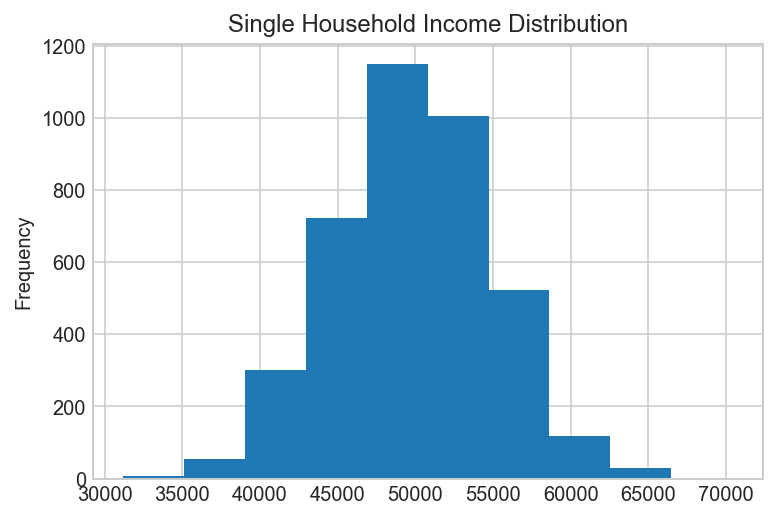

In [118]:
shohh_title = "Single Household Income Distribution"
df_hh_merge["hh_income"][df_hh_merge["hohh_status"] <= 2].plot(kind="hist", title=shohh_title, figsize=(6,4));

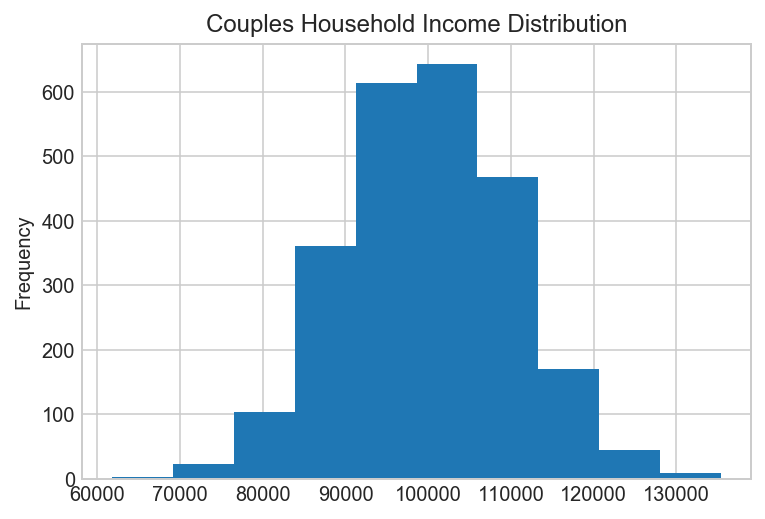

In [119]:
shohh_title = "Couples Household Income Distribution"
df_hh_merge["hh_income"][df_hh_merge["hohh_status"] >= 4].plot(kind="hist", title=shohh_title, figsize=(6,4));

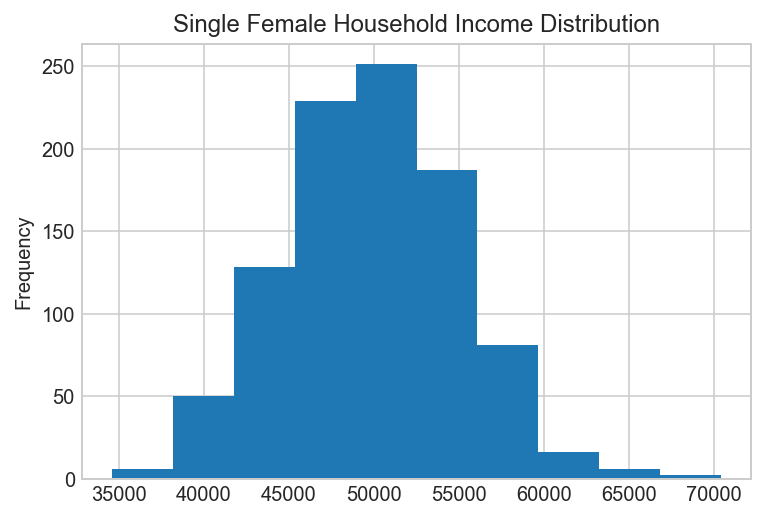

In [120]:
fhohh_title = "Single Female Household Income Distribution"
df_hh_merge["hh_income"][df_hh_merge["hohh_status"] <= 1].plot(kind="hist", title=fhohh_title, figsize=(6,4));

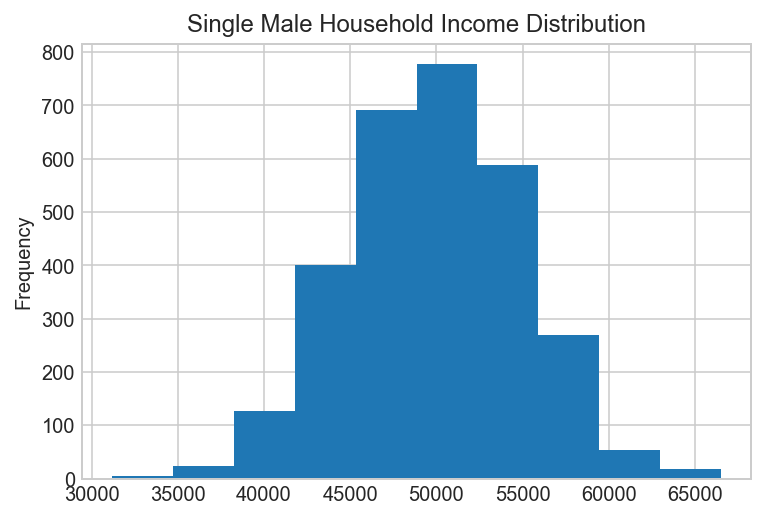

In [121]:
mhohh_title = "Single Male Household Income Distribution"
df_hh_merge["hh_income"][df_hh_merge["hohh_status"] == 2].plot(kind="hist", title=mhohh_title, figsize=(6,4));

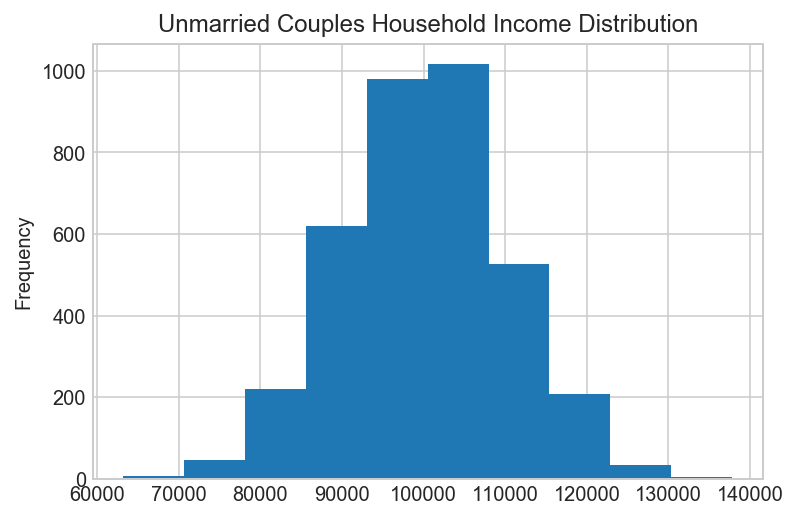

In [122]:
uhohh_title = "Unmarried Couples Household Income Distribution"
df_hh_merge["hh_income"][df_hh_merge["hohh_status"] == 3].plot(kind="hist", title=uhohh_title, figsize=(6,4));

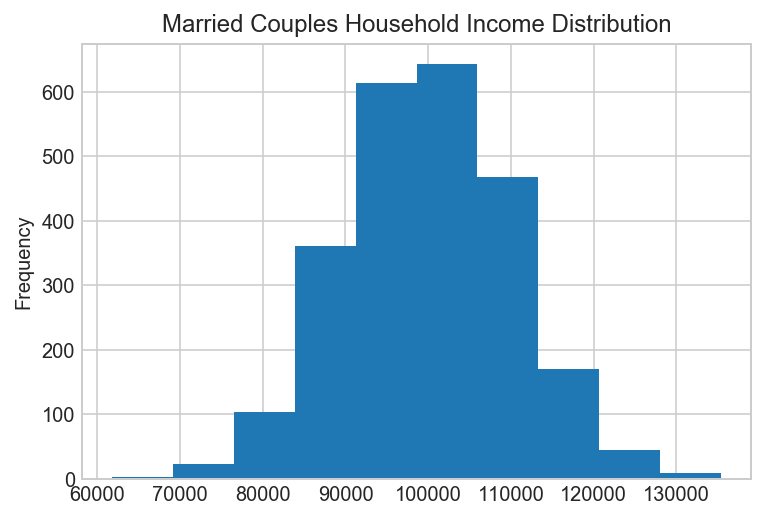

In [123]:
mhohh_title = "Married Couples Household Income Distribution"
df_hh_merge["hh_income"][df_hh_merge["hohh_status"] == 4].plot(kind="hist", title=mhohh_title, figsize=(6,4));

/Users/kjrunner/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


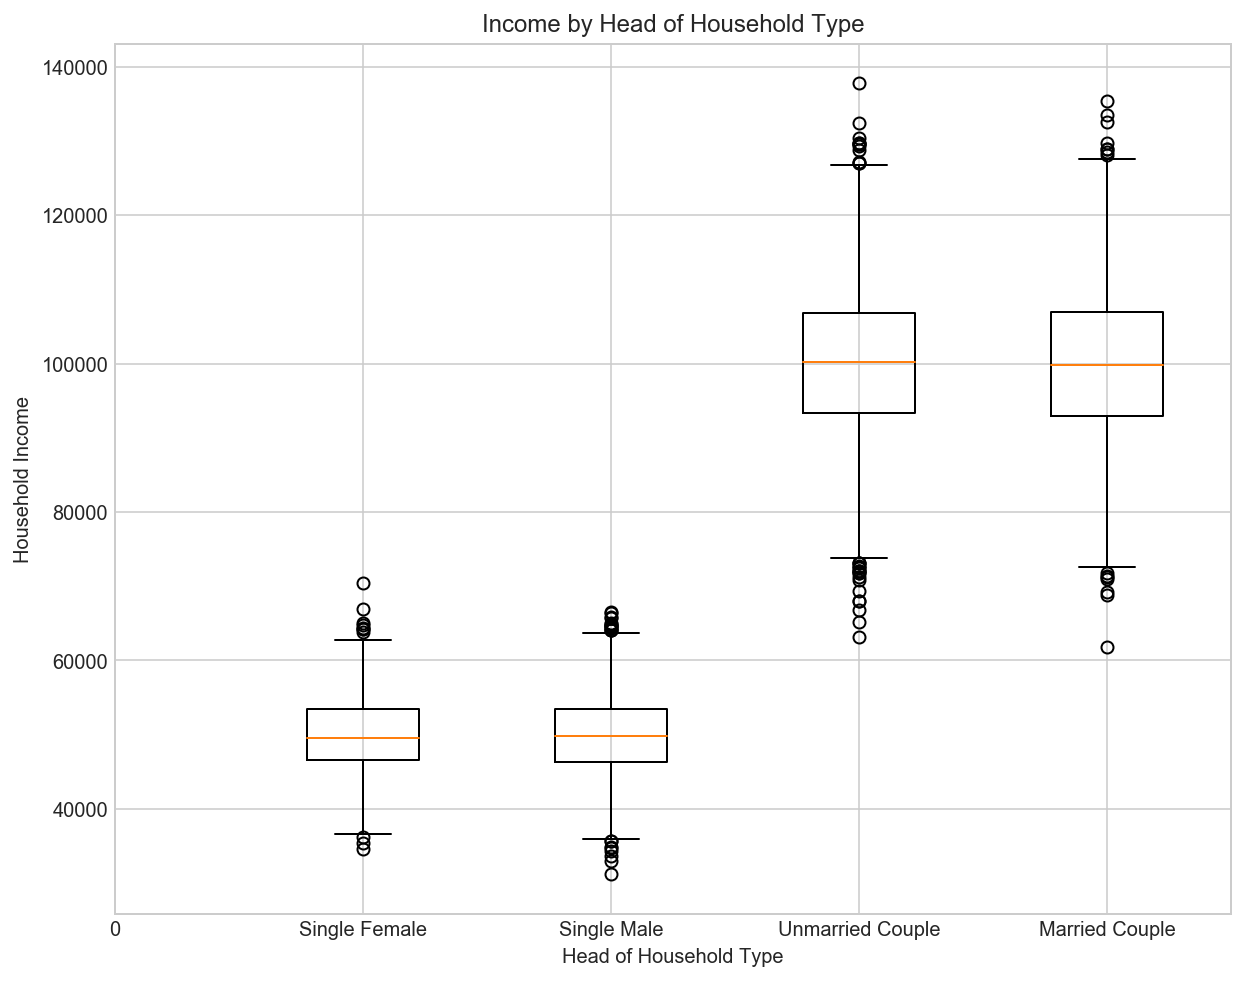

In [124]:
data1 = df_hh_merge["hh_income"][df_hh_merge["hohh_status"] == 1]
data2 = df_hh_merge["hh_income"][df_hh_merge["hohh_status"] == 2]
data3 = df_hh_merge["hh_income"][df_hh_merge["hohh_status"] == 3]
data4 = df_hh_merge["hh_income"][df_hh_merge["hohh_status"] == 4]
data = [data1, data2, data3, data4]

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.boxplot(data)
plt.title("Income by Head of Household Type")
plt.ylabel("Household Income")
plt.xlabel("Head of Household Type")
plt.xticks(np.arange(5), ('0', 'Single Female', 'Single Male', 'Unmarried Couple', 'Married Couple'))
plt.show();

In [43]:
grp_columns = ["hohh_status"]

df_hohh_inc = pd.DataFrame(df_hh_merge.groupby(grp_columns).agg(
    {"hh_income": 
       {"mean", 
        "median", 
         lambda x: stats.mode(x)[0][0], 
         "max",
         "min"}, 
     "hh_id":"count"}
    )).reset_index()

In [44]:
#df_hohh_inc.columns = df_hohh_inc.columns.droplevel()
#df_hohh_inc.columns = ["hohh_status", "inc_max","inc_min", "inc_mean", "inc_mode", "inc_median", "count"]
df_hohh_inc

hohh_status hh_income                                        hh_id
                 median     max           mean <lambda>    min hh_id
0           1     49600   70400   49861.610879    52200  34600   956
1           2     49800   66500   49871.375339    49700  31200  2952
2           3    100200  137800  100058.447239    96000  63200  3658
3           4     99800  135400   99909.038620    93600  61800  2434

In [496]:
grp_columns = ["hohh_status", "tercile_of_census_tract_income", "is_owner_of_home"]

df_econ = pd.DataFrame(df_hh_merge.groupby(grp_columns).agg(
    {"hh_income": 
       {"mean", 
        "median", 
         lambda x: stats.mode(x)[0][0], 
         "max",
         "min"},
     "tercile_of_census_tract_income":"count", 
     "is_owner_of_home":"count"}
    )).reset_index()

In [498]:
df_econ.columns = df_econ.columns.droplevel()
df_econ.columns = ["hohh_status", "tercile_of_census_tract_inc", "is_home_owner", 
                   "inc_max", "inc_min","inc_mean", "inc_mode","inc_median",
                    "census_tract_inc_ct", "home_owner_ct"]
df_econ

,hohh_status,tercile_of_census_tract_inc,is_home_owner,inc_max,inc_min,inc_mean,inc_mode,inc_median,census_tract_inc_ct,home_owner_ct
0,1,Bottom,0,63800,38700,50598.630137,49000,50650,146,146
1,1,Middle,0,64800,37300,49667.213115,44500,50400,183,183
2,1,Top,0,70400,34600,49746.730463,52200,49300,627,627
3,2,Bottom,0,66500,33700,49850.892857,51700,49750,448,448
4,2,Middle,0,65800,31200,50290.199336,50900,50500,602,602
5,2,Top,0,66400,33000,49743.638275,47800,49700,1902,1902
6,3,Bottom,0,130400,63200,100015.061296,102200,100200,571,571
7,3,Middle,0,137800,65200,100236.211699,96000,100700,718,718
8,3,Top,0,132400,66800,100015.027438,99400,100200,2369,2369
9,4,Bottom,1,135400,61800,100208.938547,103600,100100,358,358


#### Following group dataframe includes is_urban feature as well.  Initial look does not show any great difference income with urban vs rural.  If time take a closer look.

In [125]:
grp_columns2 = ["hohh_status", "tercile_of_census_tract_income", "is_owner_of_home", "is_urban"]

df_econ2 = pd.DataFrame(df_hh_merge.groupby(grp_columns2).agg(
    {"hh_income": 
       {"mean", 
        "median", 
         lambda x: stats.mode(x)[0][0]}, 
     "tercile_of_census_tract_income":"count", 
     "is_owner_of_home":"count",
     "is_urban":"count"}
    )).reset_index()

In [127]:
#df_econ2.columns = df_econ2.columns.droplevel()
#df_econ2.columns = ["hohh_status", "tercile_of_census_tract_inc", "is_home_owner", "is_urban",
                   #"inc_mean","inc_median", "inc_mode", "census_tract_inc_cnt", "home_owner_cnt","is_urban_cnt"]
df_econ2

hohh_status tercile_of_census_tract_income is_owner_of_home is_urban  \
                                                                          
0            1                         Bottom                0        0   
1            1                         Bottom                0        1   
2            1                         Middle                0        0   
3            1                         Middle                0        1   
4            1                            Top                0        0   
5            1                            Top                0        1   
6            2                         Bottom                0        0   
7            2                         Bottom                0        1   
8            2                         Middle                0        0   
9            2                         Middle                0        1   
10           2                            Top                0        0   
11           2                            Top                0        1   
12           3                         Bottom                0        0   
13           3                         Bottom                0        1   
14           3                         Middle                0        0   
15           3                         Middle                0        1   
16           3                            Top                0        0   
17           3                            Top                0        1   
18           4                         Bottom                1        0   
19           4                         Bottom                1        1   
20           4                         Middle                1        0   
21           4                         Middle                1        1   
22           4                            Top                1        0   
23           4                            Top                1        1   

   hh_income                        tercile_of_census_tract_income  \
    <lambda>  median           mean tercile_of_census_tract_income   
0      47100   50800   50396.153846                             52   
1      49000   50500   50710.638298                             94   
2      45000   50500   49979.411765                             68   
3      44500   50300   49482.608696                            115   
4      52200   49100   49475.619835                            242   
5      48000   49400   49917.142857                            385   
6      49400   49400   49765.363128                            179   
7      47000   49900   49907.806691                            269   
8      50900   49900   49797.881356                            236   
9      48300   50650   50607.650273                            366   
10     51400   50000   50015.200000                            750   
11     47800   49500   49566.840278                           1152   
12    102200  100000   99502.953586                            237   
13    101200  100600  100378.443114                            334   
14     93600  101000  100345.762712                            295   
15     96000  100600  100159.810875                            423   
16     94800  100000   99889.613035                            982   
17     99400  100400  100103.821197                           1387   
18    103600  100400  100548.905109                            137   
19     93400  100000   99998.190045                            221   
20     93600   99900  100226.530612                            196   
21     96400   98800   99485.534591                            318   
22     87000   99600   99659.900166                            601   
23     93600  100200  100028.511967                            961   

   is_owner_of_home is_urban  
   is_owner_of_home is_urban  
0                52       52  
1                94       94  
2                68       68  
3               115      115  
4               242      242  
5             

## Section 1, Part 3